# CNN - MNIST

(42000, 784)


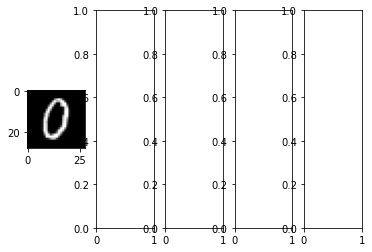

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()
fig_list = list() # 각각의 subplot 저장 용도

for i in range(5):
    fig_list.append(fig.add_subplot(1,5,i+1))

# Raw Data Loading
df = pd.read_csv('mnist/train.csv')
img_data = df.drop('label', axis=1, inplace=False).values # 이미지 데이터
print(img_data.shape) # (42000, 784)

# 샘플용 이미지 
original_img = img_data[5:6].reshape(28,28) # 행 슬라이스: 1차원
fig_list[0].imshow(original_img, cmap='gray') # 2차원 데이터 + cmap = 흑백 이미지

## Convolution Layer
### Conv 작업

In [2]:
# 4차원 입력 이미지: (1: 이미지 개수, 28: 세로, 28: 가로, 1: 채널수)
print(original_img.shape) # 2차원: (28, 28)

input_image = original_img.reshape((1,) + original_img.shape + (1,))
print(input_image.shape) # (1, 28, 28, 1)

# 실수 처리
input_image = input_image.astype(np.float32)

# filter(kernel): (3,3,1,4)
weight = np.random.rand(3,3,1,4) # 난수값
print(weight.shape) # (3, 3, 1, 4)

# stride: 1
# padding: VALID
sess = tf.Session()
conv2d = tf.nn.conv2d(input_image, weight,
                             strides=[1,1,1,1], padding='VALID')
conv2d_result = sess.run(conv2d)
print(conv2d_result.shape) # (1, 26, 26, 4): Feature Map

(28, 28)
(1, 28, 28, 1)
(3, 3, 1, 4)
(1, 26, 26, 4)


### ReLU 처리

In [3]:
# tensor node
relu_ = tf.nn.relu(conv2d_result) 

# numpy array
relu_result = sess.run(relu_) # Activation Map
print(relu_result.shape) # (1, 26, 26, 4)

(1, 26, 26, 4)


## Pooling Layer

In [5]:
# ksize: 2
# stride: 2
pooling = tf.nn.max_pool(relu_result, ksize=[1,2,2,1],
                         strides=[1,2,2,1], padding='VALID')

pooling_result = sess.run(pooling)
print(pooling_result.shape) # (1, 13, 13, 4: filter 개수)

(1, 13, 13, 4)


## 이미지 출력

In [6]:
# (4, 13, 13, 1): 맨 앞과 맨 뒤의 위치, 즉 축을 바꿈
# (이미지 개수, height, width, 차원 높임)
i = np.swapaxes(pooling_result, 0,3) 
print(i.shape) # (4, 13, 13, 1) 

# 출력
for filter_idx, t_img in enumerate(i):
    fig_list[filter_idx+1].imshow(t_img, cmap='gray')

(4, 13, 13, 1)


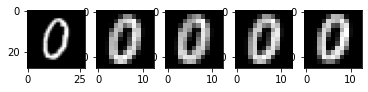

In [8]:
fig = plt.figure()
fig_list = list()

for i in range(5):
    fig_list.append(fig.add_subplot(1,5,i+1))

# 샘플용 이미지 
original_img = img_data[5:6].reshape(28,28) 
fig_list[0].imshow(original_img, cmap='gray') 

# 작업된 이미지
i = np.swapaxes(pooling_result, 0,3) 
for filter_idx, t_img in enumerate(i):
    fig_list[filter_idx+1].imshow(t_img, cmap='gray')